### 1. Business Understanding 
1.How many seasons are the peak season or the low season?<br>
2.Which type of house do visitors like to browse? Are they sensitive to price? <br>
3.What type of room do visitors like best?What’s the difference between the type of room a visitor is looking at?

answer: https://medium.com/@yangwang_57085/use-seattle-airbnb-data-to-find-best-fit-sightseer-to-seattle-db2d29d66656

In [33]:
#Import packages to be used
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline
calendar_data = pd.read_csv('./seattle/calendar.csv')
listings_data = pd.read_csv('./seattle/listings.csv')
review_data = pd.read_csv('./seattle/reviews.csv')

In [34]:
calendar_data[calendar_data['price'].isnull().values==False].sort_values(['listing_id','date'])
time_format = '%Y-%m-%d'
datime = pd.to_datetime(calendar_data.date,format = time_format)

In [35]:
time_format = '%Y-%m-%d'
datime = pd.to_datetime(calendar_data.date,format = time_format)
calendar_data['day_week'] = datime.dt.dayofweek
calendar_data['day_month'] = datime.dt.month
calendar_data['day_year'] = datime.dt.dayofyear
calendar_data['week_year'] = datime.dt.weekofyear
calendar_data = calendar_data[calendar_data['price'].isnull().values==False]
calendar_data['price'] = calendar_data['price'].str.replace('[$, ]','').astype('float')


## 2.Data Understanding

Text(0.5,0,'day_month')

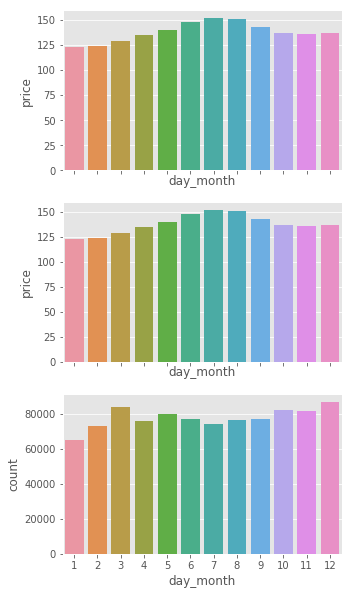

In [36]:
# find the  landlord provide rooms mean room price and all one month price sum as the months change
fig, (axis1,axis2,axis3) = plt.subplots(3,1,sharex=True,figsize=(5,10))
df1 = calendar_data[['day_month','price']].groupby(['day_month']).mean()
sns.barplot(x = df1.index,y = df1.price,ax = axis1)
plt.ylabel('expect mean value')
plt.xlabel('month')

df1 = calendar_data[['day_month','price']].groupby(['day_month']).mean()
sns.barplot(x = df1.index,y = df1.price,ax=axis2)
plt.ylabel('mean')
plt.xlabel('day_month2')

df1 = calendar_data[['day_month','price']].groupby(['day_month']).count()
sns.barplot(x = df1.index,y = df1.price,ax=axis3)
plt.ylabel('count')
plt.xlabel('day_month')

Text(0.5,0,'week_year')

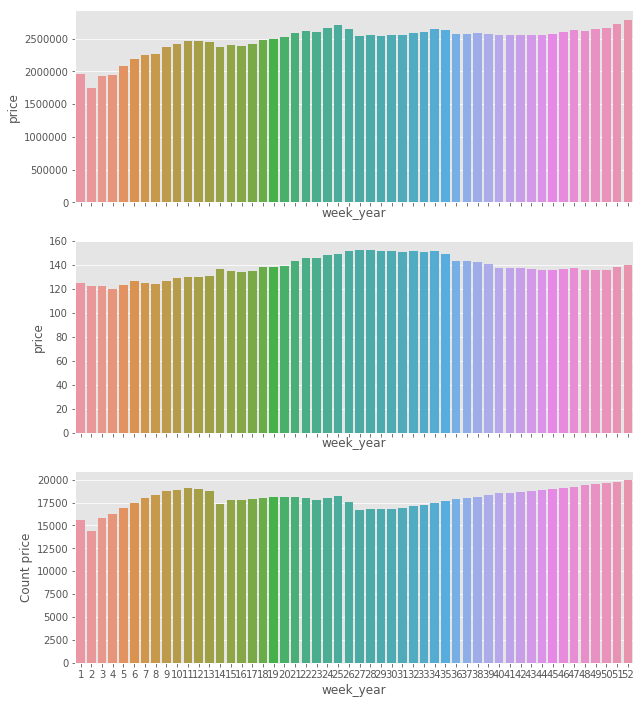

In [37]:
# find the  landlord provide rooms mean room price and all one month price sum as the weeks change
fig, (axis1,axis2,axis3) = plt.subplots(3,1,sharex=True,figsize=(10,12))

df1 = calendar_data[['week_year','price']].groupby(['week_year']).sum()
sns.barplot(x = df1.index,y = df1.price,ax=axis1)
plt.ylabel('All week price')
plt.xlabel('day_month')

df1 = calendar_data[['week_year','price']].groupby(['week_year']).mean()
sns.barplot(x = df1.index,y = df1.price,ax=axis2)
plt.ylabel('mean')
plt.xlabel('day_month')

df1 = calendar_data[['week_year','price']].groupby(['week_year']).count()
sns.barplot(x = df1.index,y = df1.price,ax=axis3)
plt.ylabel('Count price')
plt.xlabel('week_year')

Text(0.5,0,'week_year')

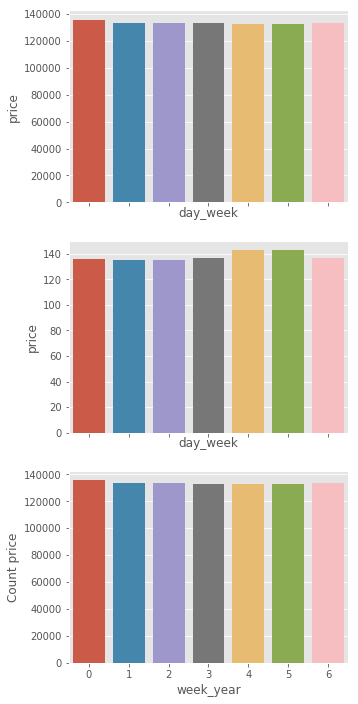

In [38]:
# find the  landlord provide rooms mean room price and all one month price sum as the weeks change
fig, (axis1,axis2,axis3) = plt.subplots(3,1,sharex=True,figsize=(5,12))
# plt.figure(figsize=(10,6))
df1 = calendar_data[['day_week','price']].groupby(['day_week']).count()
sns.barplot(x = df1.index,y = df1.price,ax=axis1)
plt.ylabel('expect week price')
plt.xlabel('week')

df1 = calendar_data[['day_week','price']].groupby(['day_week']).mean()
sns.barplot(x = df1.index,y = df1.price,ax=axis2)
plt.ylabel('mean')
plt.xlabel('day_month')

df1 = calendar_data[['day_week','price']].groupby(['day_week']).count()
sns.barplot(x = df1.index,y = df1.price,ax=axis3)
plt.ylabel('Count price')
plt.xlabel('week_year')

Text(0.5,0,'week_year')

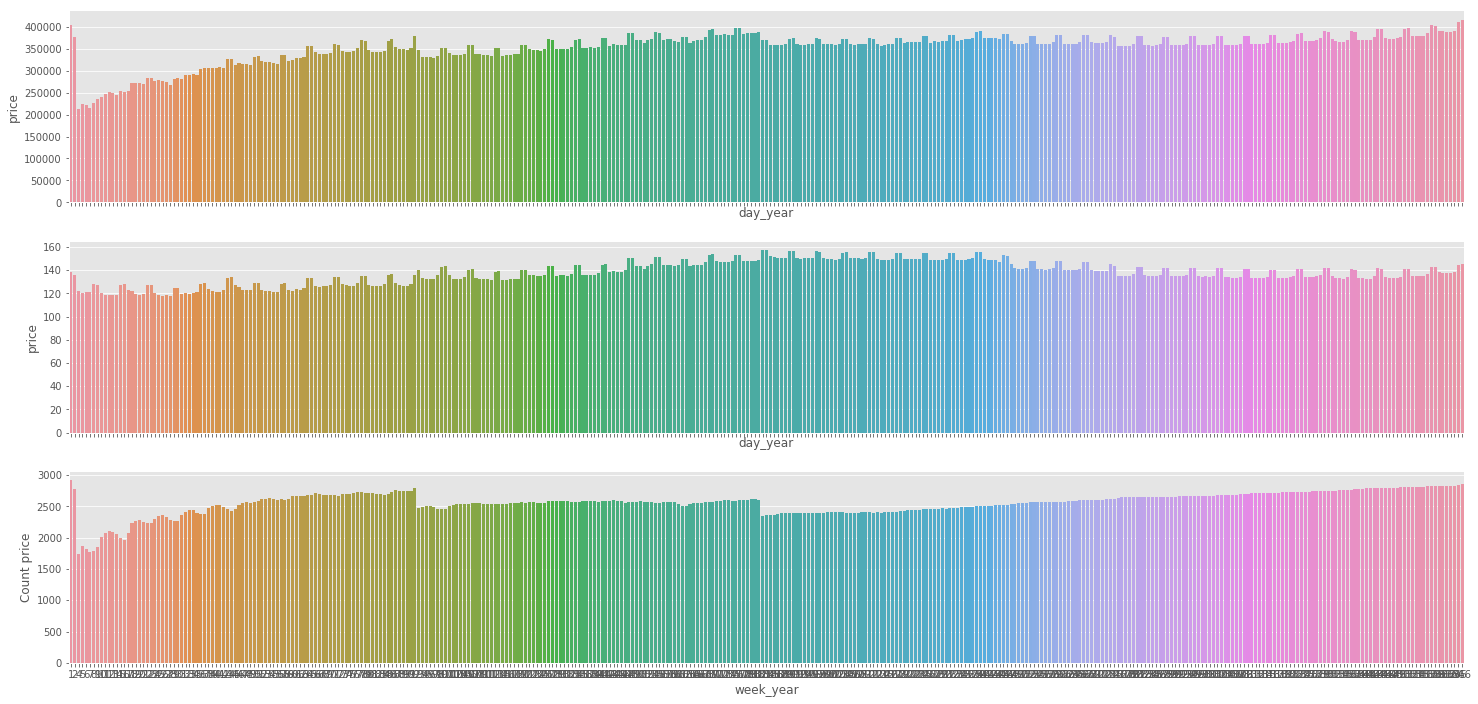

In [39]:
# find the  landlord provide rooms mean room price and all one month price sum as the day change
fig, (axis1,axis2,axis3) = plt.subplots(3,1,sharex=True,figsize=(25,12))

df1 = calendar_data[['day_year','price']].groupby(['day_year']).sum()
sns.barplot(x = df1.index,y = df1.price,ax=axis1)
plt.ylabel('All week price')
plt.xlabel('day_month')

df1 = calendar_data[['day_year','price']].groupby(['day_year']).mean()
sns.barplot(x = df1.index,y = df1.price,ax=axis2)
plt.ylabel('mean')
plt.xlabel('day_month')

df1 = calendar_data[['day_year','price']].groupby(['day_year']).count()
sns.barplot(x = df1.index,y = df1.price,ax=axis3)
plt.ylabel('Count price')
plt.xlabel('week_year')

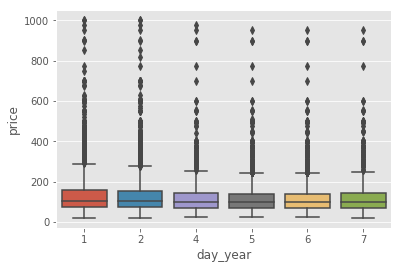

In [40]:
# Change in the first seven days
sns.boxplot(y='price',x = 'day_year',data = calendar_data[calendar_data['day_year']<8])

Text(0.5,0,'day')

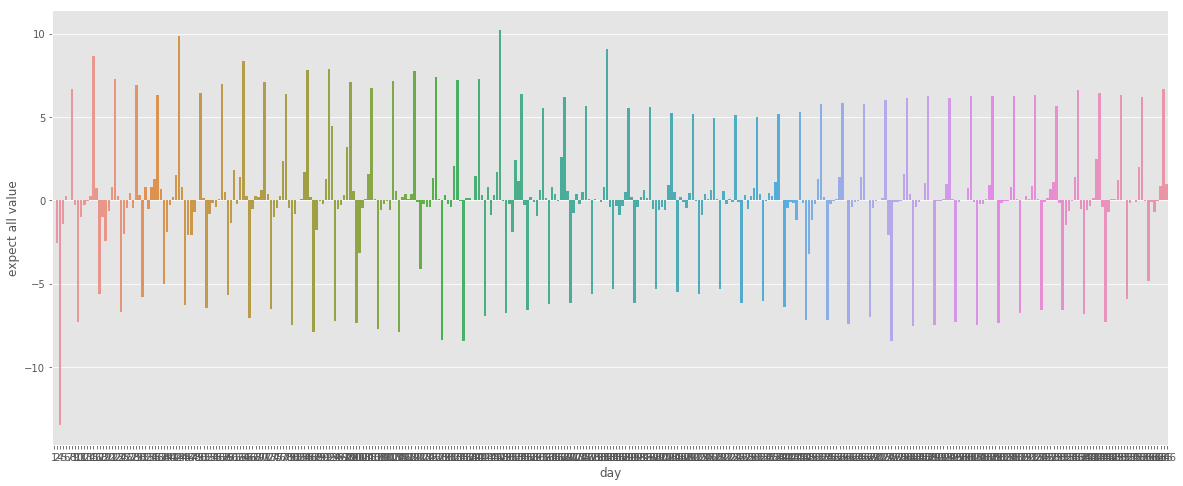

In [41]:
#look everyday price change
plt.figure(figsize=(20,8))
df1 = calendar_data[['day_year','price']].groupby(['day_year']).mean()
df2 = list()
df2.append(0)
for i in range(1,len(df1)):
     df2.append(df1['price'].iloc[i] - df1['price'].iloc[i-1])
df1['mean_change_value'] = pd.Series(df2,index=df1.index)
sns.barplot(x = df1.index,y = df1.mean_change_value)
plt.ylabel('expect all value')
plt.xlabel('day')

In [42]:
#change mean  value sort
df1.sort_values('mean_change_value',ascending=False)

,price,mean_change_value
day_year,,
148,150.278318,10.230718
43,132.958621,9.870894
183,157.480000,9.089579
15,127.609155,8.678572
64,133.030213,8.366300
92,135.682796,7.867551
85,136.217407,7.833535
120,140.213172,7.766730
127,143.608813,7.421460


Text(0.5,0,'month')

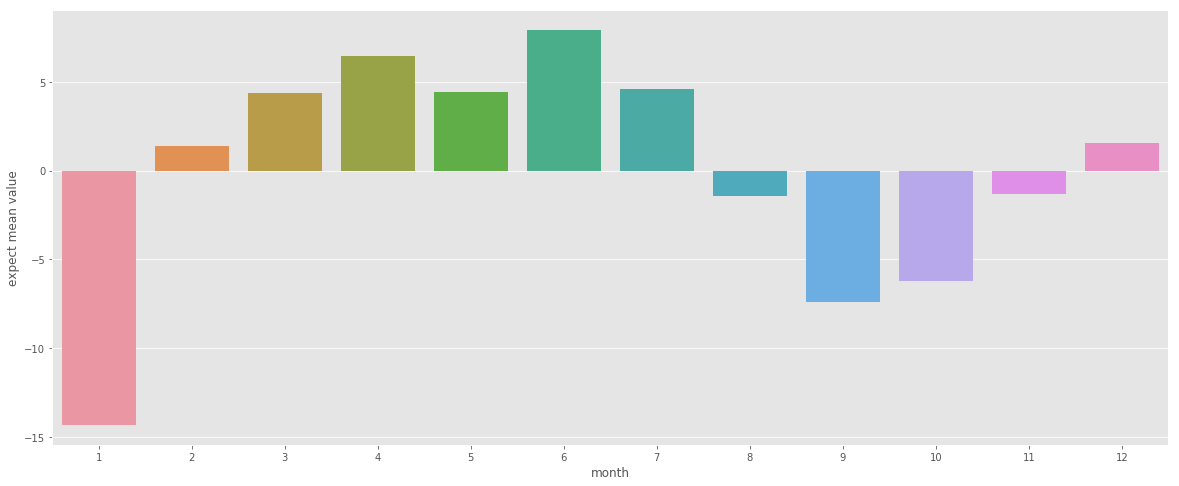

In [43]:
#look everyday price change
plt.figure(figsize=(20,8))
df1 = calendar_data[['day_month','price']].groupby(['day_month']).mean()
df2 = list()
df2.append(df1['price'].iloc[0] - df1['price'].iloc[11])
for i in range(1,len(df1)):
     df2.append(df1['price'].iloc[i] - df1['price'].iloc[i-1])
df1['mean_change_value'] = pd.Series(df2,index=df1.index)
sns.barplot(x = df1.index,y = df1.mean_change_value)
plt.ylabel('expect mean value')
plt.xlabel('month')

In [44]:
# process review_data
time_format = '%Y-%m-%d'
datatime = pd.to_datetime(review_data.date,format = time_format)

review_data['day_week'] = datatime.dt.dayofweek
review_data['day_month'] = datatime.dt.month
review_data['day_year'] = datatime.dt.dayofyear
review_data['week_year'] = datatime.dt.weekofyear
review_data.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,day_week,day_month,day_year,week_year
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,6,7,200,29
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,0,7,201,30
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",6,7,207,30
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,6,8,214,31
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,0,8,222,33


Text(0.5,0,'month')

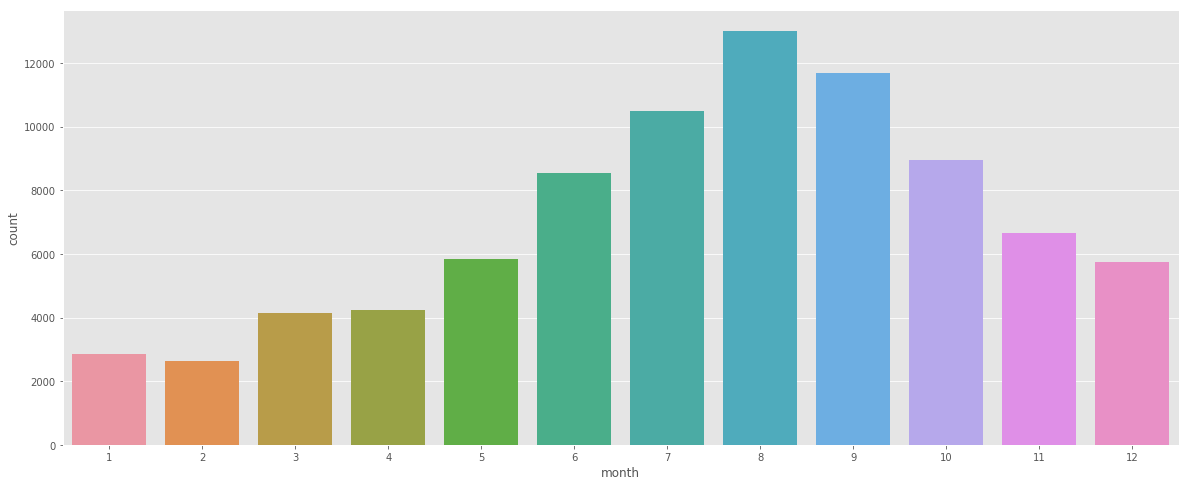

In [45]:
#look client each month visit
plt.figure(figsize=(20,8))
df1 = review_data.groupby(['day_month']).count()['id']
sns.barplot(x = df1.index,y = df1.values)
plt.ylabel('count')
plt.xlabel('month')

Text(0.5,0,'week')

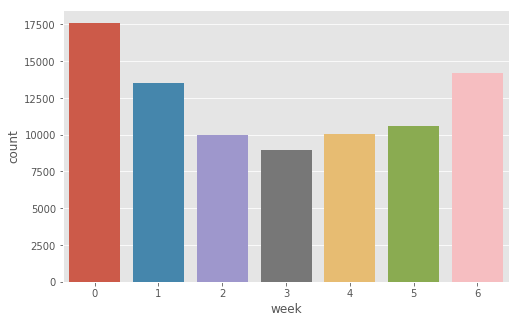

In [46]:
#look client each week of day at  visit
plt.figure(figsize=(8,5))
df2 = review_data.groupby(['day_week']).count()['id']
sns.barplot(x = df2.index,y = df2.values)
plt.ylabel('count')
plt.xlabel('week')


Text(0.5,0,'month')

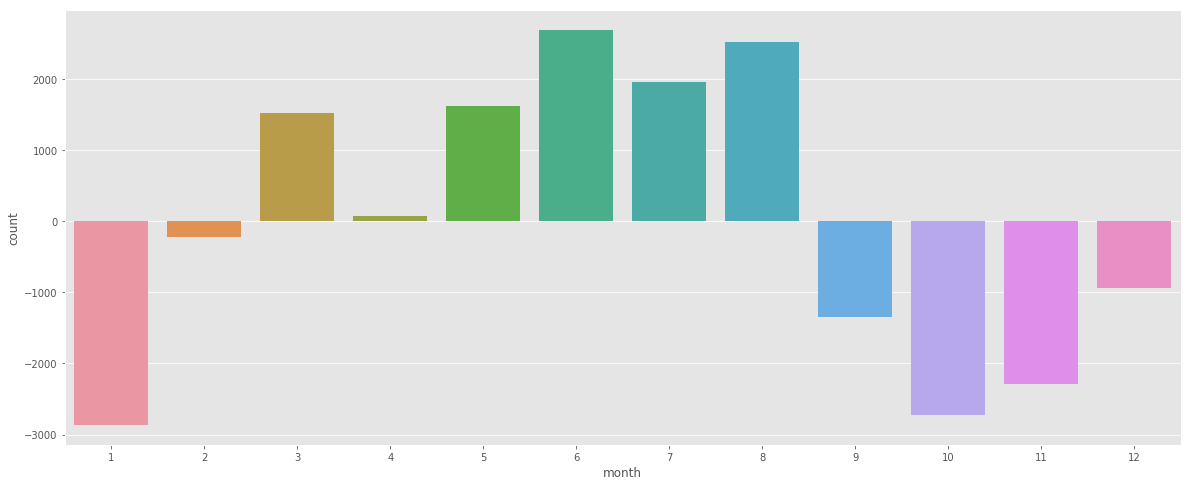

In [47]:
#look every month count change
plt.figure(figsize=(20,8))
df3 = review_data.groupby(['day_month']).count()['id']
df2 = list()
df2.append(df3.iloc[0] - df3.iloc[11])
for i in range(1,len(df3)):
     df2.append(df3.iloc[i] - df3.iloc[i-1])
df3['mean_change_value'] = pd.Series(df2,index=df3.index)
sns.barplot(x = df3.mean_change_value.index,y = df3.mean_change_value.values)
plt.ylabel('count')
plt.xlabel('month')

In [48]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [50]:
review_data.info()
review_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 10 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
day_week         84849 non-null int64
day_month        84849 non-null int64
day_year         84849 non-null int64
week_year        84849 non-null int64
dtypes: int64(7), object(3)
memory usage: 6.5+ MB


,listing_id,id,date,reviewer_id,reviewer_name,comments,day_week,day_month,day_year,week_year
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,6,7,200,29
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,0,7,201,30
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",6,7,207,30
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,6,8,214,31
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,0,8,222,33


## explore listings data

In [51]:
ld = listings_data.loc[:,['name', 'summary', 'space', 'description', 
    'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
    'neighbourhood_group_cleansed', 'property_type', 'room_type', 
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
    'amenities', 'price', 'cleaning_fee', 'minimum_nights',
    'maximum_nights', 'instant_bookable',
    'cancellation_policy', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value']]

In [52]:
listings = pd.read_csv('./seattle/listings.csv')
listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [53]:
df = listings[['last_scraped',"host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]

In [54]:
df.head()

,last_scraped,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,2016-01-04,96%,100%,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,207,95.0,moderate,4.07
1,2016-01-04,98%,100%,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,43,96.0,strict,1.48
2,2016-01-04,67%,100%,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,20,97.0,strict,1.15
3,2016-01-04,NaN,NaN,f,1.0,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,0,NaN,flexible,NaN
4,2016-01-04,100%,NaN,f,2.0,98119,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,38,92.0,strict,0.89


In [55]:
# % of NaN values
(len(df) - df.count())/len(df)*100

last_scraped             0.000000
host_response_rate      13.698271
host_acceptance_rate    20.246202
host_is_superhost        0.052383
host_listings_count      0.052383
zipcode                  0.183342
property_type            0.026192
room_type                0.000000
accommodates             0.000000
bathrooms                0.419068
bedrooms                 0.157150
beds                     0.026192
price                    0.000000
number_of_reviews        0.000000
review_scores_rating    16.946045
cancellation_policy      0.000000
reviews_per_month       16.422211
dtype: float64

In [56]:
# drop NaN rows
df2 = df.dropna(axis=0)

In [57]:
# % of rows droppped
(len(df)-len(df2))/len(df)*100

30.434782608695656

In [58]:
df2 = df.dropna(axis=0)

In [59]:
(len(df) - len(df2))/len(df)*100

30.434782608695656

In [60]:
pd.options.mode.chained_assignment = None #  # default='warn'
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].astype(str)
df2['host_response_rate'] = df2['host_response_rate'].astype(str)
df2['price'] = df2['price'].astype(str)

In [61]:
df2.head()

,last_scraped,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,2016-01-04,96%,100%,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,207,95.0,moderate,4.07
1,2016-01-04,98%,100%,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,43,96.0,strict,1.48
2,2016-01-04,67%,100%,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,20,97.0,strict,1.15
6,2016-01-04,100%,100%,t,1.0,98119,House,Private room,2,1.0,1.0,1.0,$80.00,58,99.0,moderate,2.46
7,2016-01-04,100%,100%,t,5.0,98119,Cabin,Private room,2,1.0,1.0,1.0,$60.00,173,97.0,strict,4.73


In [62]:
# clean data
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].str.replace('%','').astype('float')
df2['host_response_rate'] = df2['host_response_rate'].str.replace('%','').astype('float')
df2['price'] = df2['price'].str.replace('[$, ]','').astype('float')


In [63]:
df2['superhost'] = np.where(df2['host_is_superhost']=='t',1,0)
del df2['host_is_superhost']

In [64]:
# select non-numeric variables and create dummies
non_num_vars = df2.select_dtypes(include=['object']).columns
df2[non_num_vars].head()

,last_scraped,zipcode,property_type,room_type,cancellation_policy
0,2016-01-04,98119,Apartment,Entire home/apt,moderate
1,2016-01-04,98119,Apartment,Entire home/apt,strict
2,2016-01-04,98119,House,Entire home/apt,strict
6,2016-01-04,98119,House,Private room,moderate
7,2016-01-04,98119,Cabin,Private room,strict


In [65]:
dummy_vars = pd.get_dummies(df2[non_num_vars])
dummy_vars.head()

,last_scraped_2016-01-04,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [66]:
# drop non-numeric variables from df2 and add the dummies
df3 = df2.drop(non_num_vars,axis=1)
df3 = pd.merge(df3,dummy_vars,left_index=True,right_index=True)
df3.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,...,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,207,95.0,...,0,0,0,0,1,0,0,0,1,0
1,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,43,96.0,...,0,0,0,0,1,0,0,0,0,1
2,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,20,97.0,...,0,0,0,0,1,0,0,0,0,1
6,100.0,100.0,1.0,2,1.0,1.0,1.0,80.0,58,99.0,...,0,0,0,0,0,1,0,0,1,0
7,100.0,100.0,5.0,2,1.0,1.0,1.0,60.0,173,97.0,...,0,0,0,0,0,1,0,0,0,1


## summary stats

Text(0.5,1,'Histogram of listing prices')

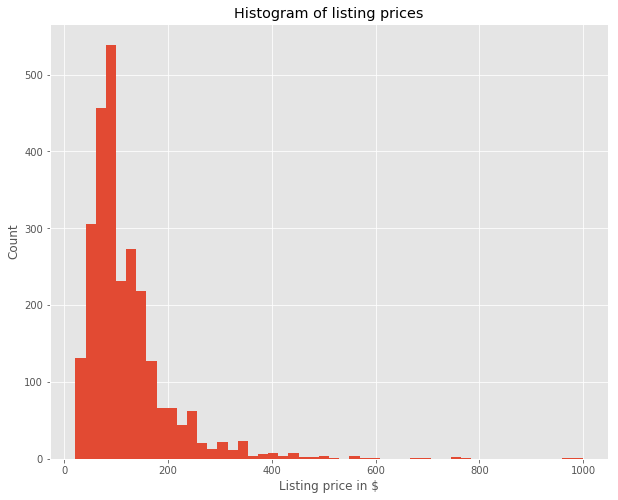

In [71]:
# Some summary stats
plt.figure(figsize=(10,8))
df3['price'].hist(bins = 50)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices')

In [72]:
plt.figure(figsize=(10,8))
df3['price'].describe()

count    2656.000000
mean      120.737952
std        81.475664
min        22.000000
25%        70.000000
50%        99.000000
75%       145.000000
max       999.000000
Name: price, dtype: float64

<Figure size 720x576 with 0 Axes>

Text(0.5,1,'Histogram of listing prices')

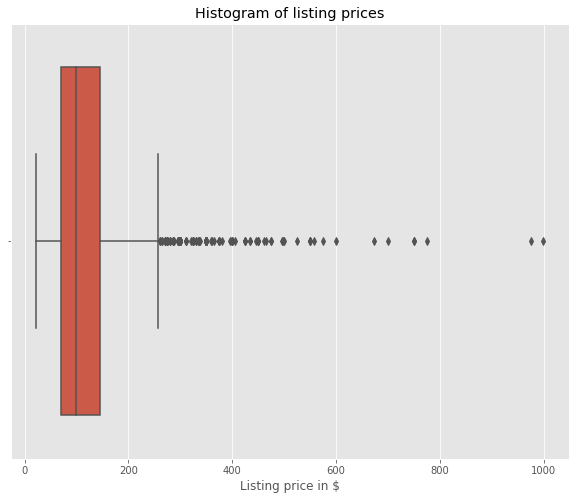

In [75]:
# price at listing data distribution 
plt.figure(figsize=(10,8))
sns.boxplot(df3['price'])
# plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices')

Text(0.5,1,'No. of bedrooms vs price')

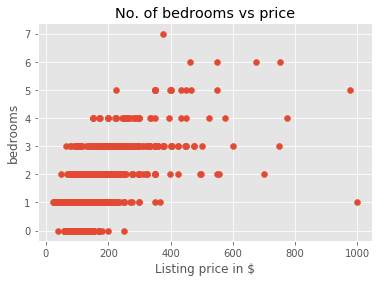

In [76]:
# bedrooms vs price
plt.scatter(df3['price'],df3['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price in $')
plt.title('No. of bedrooms vs price')

Text(0.5,1,'No. of reviews vs price')

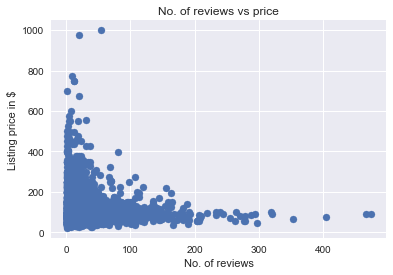

In [406]:
# price vs number of reviews
plt.scatter(df3['number_of_reviews'],df3['price'])
plt.ylabel('Listing price in $')
plt.xlabel('No. of reviews')
plt.title('No. of reviews vs price')


Text(0.5,0,'Number review')

<Figure size 1440x576 with 0 Axes>

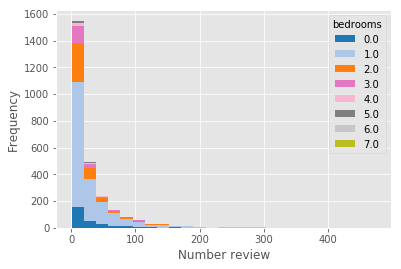

In [77]:
# bedrooms vs number of reviews
plt.figure(figsize=(20,8))
df3.pivot(columns='bedrooms',values = 'number_of_reviews').plot.hist(stacked = True,bins=25,color = ['#1f77b4', '#aec7e8', '#ff7f0e', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22'])
plt.xlabel('Number review')

Text(0.5,0,'price  (picture 1)')

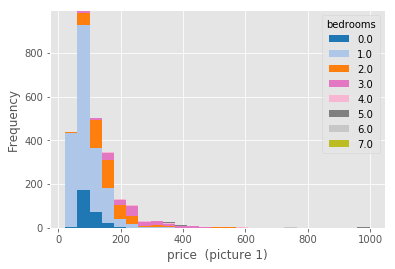

In [78]:
# bedrooms vs price 
df3.pivot(columns='bedrooms',values = 'price').plot.hist(stacked = True,bins=25,color = ['#1f77b4', '#aec7e8', '#ff7f0e', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22'])
plt.xlabel('price  (picture 1)')

Text(0.5,0,'Number review per month (picture 2)')

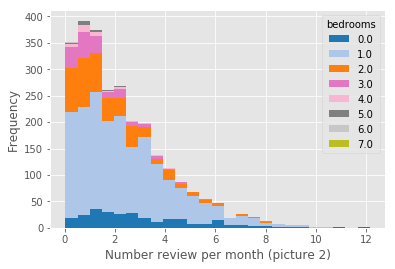

In [79]:
# bedrooms vs one month reviews
df3.pivot(columns='bedrooms',values = 'reviews_per_month').plot.hist(stacked = True,bins=25,color = ['#1f77b4', '#aec7e8', '#ff7f0e', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22'])
plt.xlabel('Number review per month (picture 2)')

Text(0.5,0,'Listing price in $')

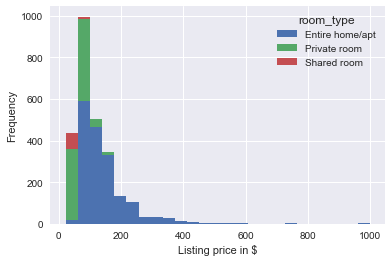

In [374]:
# room type vs price
df2.pivot(columns='room_type',values='price').plot.hist(stacked=True,bins=25)
plt.xlabel('Listing price in $')

Text(0,0.5,'sum')

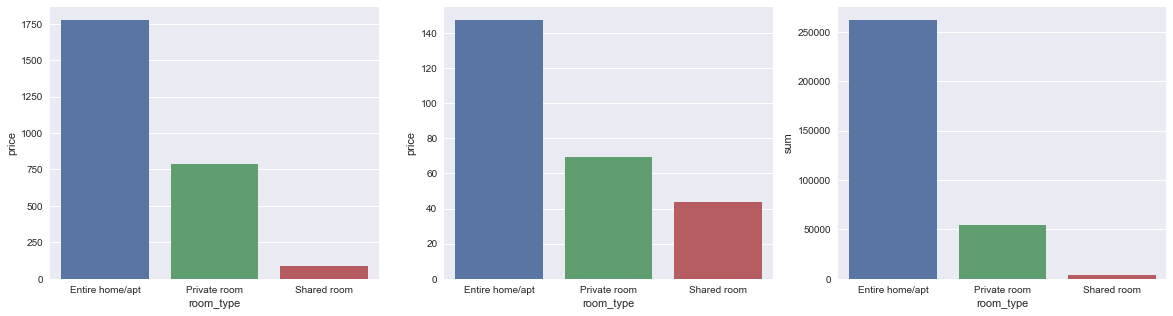

In [443]:
# room type count,mean price ,sum price
fig, (axis1,axis2,axis3) = plt.subplots(1,3,sharex=True,figsize=(20,5))
dd1 = df2[['room_type','price']].groupby('room_type').count()
sns.barplot(x = dd1.index,y = dd1.price,ax=axis1)
plt.ylabel('count')
dd1 = df2[['room_type','price']].groupby('room_type').mean()
sns.barplot(x = dd1.index,y = dd1.price,ax=axis2)
plt.ylabel('mean')
dd1 = df2[['room_type','price']].groupby('room_type').sum()
sns.barplot(x = dd1.index,y = dd1.price,ax=axis3)
plt.ylabel('sum')

Text(0.5,0,'Number review')

<Figure size 1440x576 with 0 Axes>

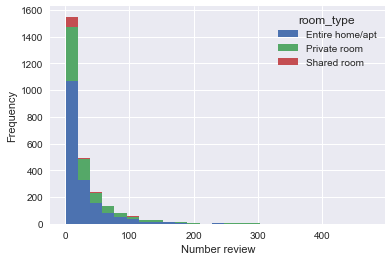

In [482]:
#room type vs number of reviews
plt.figure(figsize=(20,8))
df2.pivot(columns='room_type',values='number_of_reviews').plot.hist(stacked=True,bins=25)
plt.xlabel('Number review')

Text(0.5,0,'Number review per month')

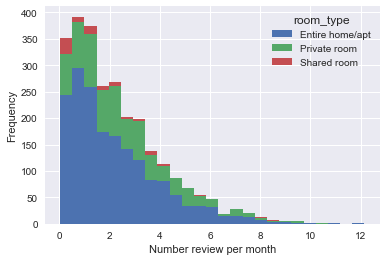

In [414]:
# room type vs average every month reviews
df2.pivot(columns='room_type',values='reviews_per_month').plot.hist(stacked=True,bins=25)
plt.xlabel('Number review per month')

In [294]:
cols = ['number_of_reviews','host_acceptance_rate','host_listings_count','accommodates',
       'bathrooms','bedrooms','beds','price']

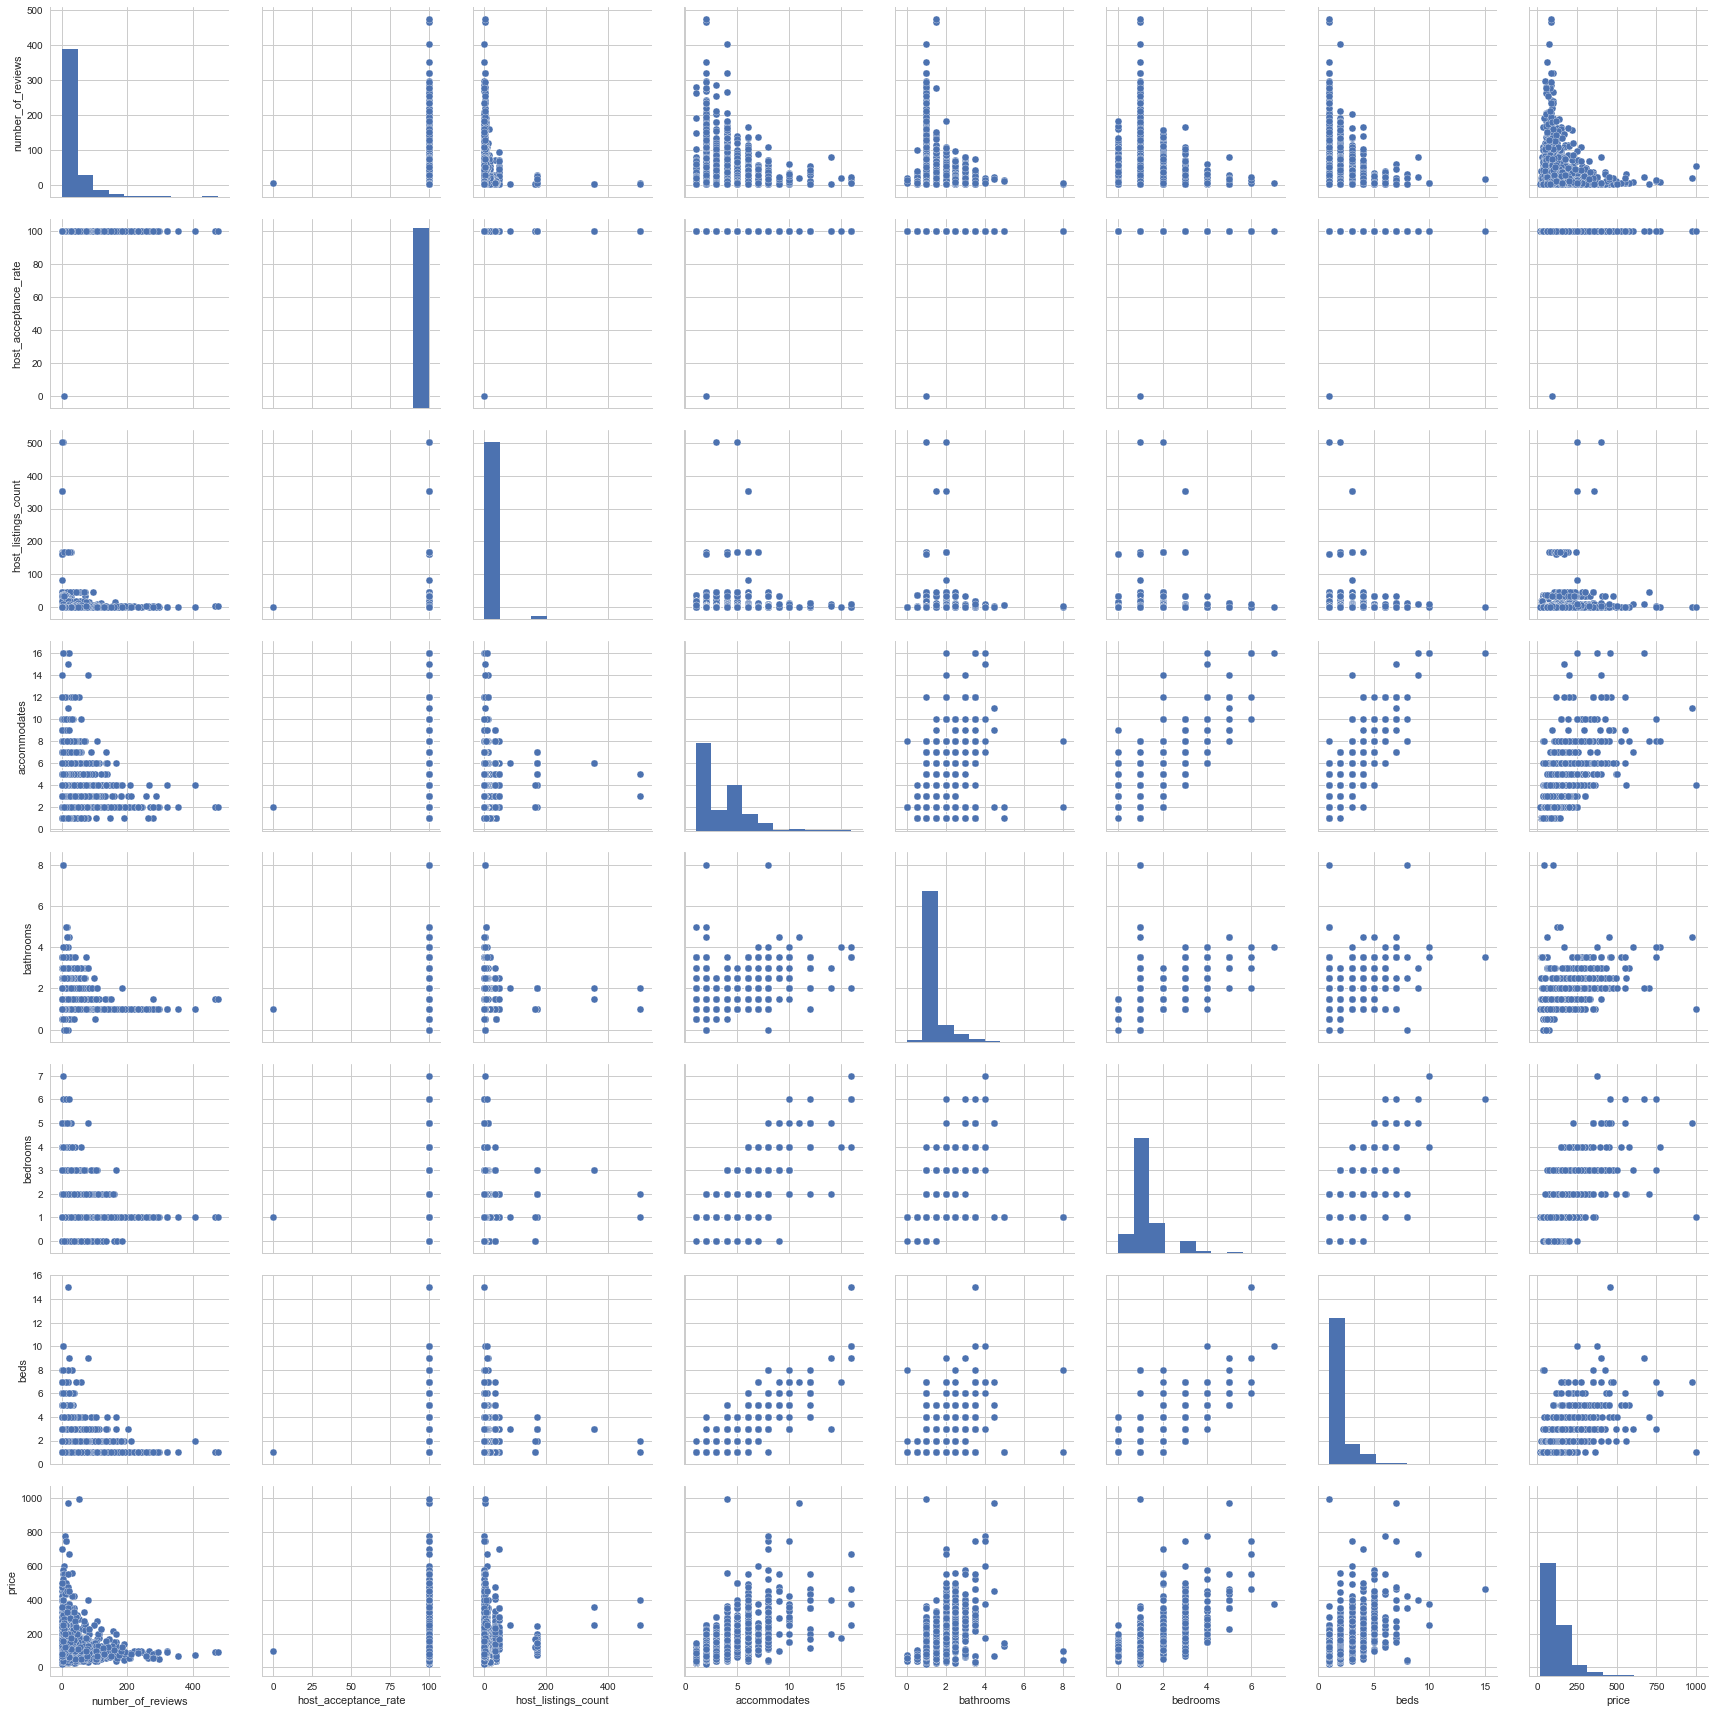

In [295]:
# Distribution chart
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(df3[cols],size=3)
plt.show()

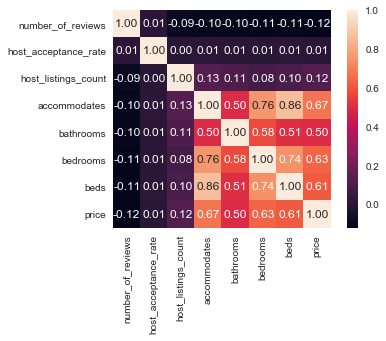

In [296]:
#  correlation hot map 
corrs = np.corrcoef(df3[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(corrs,cbar = True,annot=True,square=True,fmt='.2f',yticklabels=cols,xticklabels=cols)

# 4.Model Data

In [80]:
np.random.seed(1)
indices = np.random.permutation(len(df3))
train_size = int(round(0.8*len(df3)))
test_size = len(df3) - train_size


In [81]:
y = df3['price']
x = df3.drop('price',axis = 1)
x.train = x.iloc[indices[0:train_size]]
y.train = y.iloc[indices[0:train_size]]
x.test = x.iloc[indices[train_size+1:]]
y.test = y.iloc[indices[train_size+1:]]

x2 = x.train.as_matrix()
y2 = y.train.as_matrix()


E:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
E:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
E:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [82]:
import statsmodels.api as sm
olsmod = sm.OLS(y2,x2)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     73.20
Date:                Tue, 18 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:11:48   Log-Likelihood:                -11196.
No. Observations:                2125   AIC:                         2.251e+04
Df Residuals:                    2067   BIC:                         2.284e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1913      0.100     -1.922      0.0

In [83]:
x0 = x.test.as_matrix()
y0 = y.test.as_matrix()

ypred = olsres.predict(x0)
from sklearn.metrics import  mean_squared_error
from math import sqrt
rms_ols = sqrt(mean_squared_error(y0,ypred))
rms_ols

E:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
E:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


56.38292278388188

In [84]:
beds = x.test['bedrooms'].as_matrix()

E:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


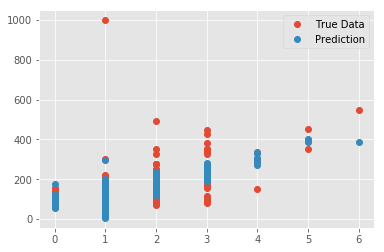

In [85]:
fig,ax = plt.subplots()
ax.plot(beds,y0,'o',label = 'True Data')
ax.plot(beds,ypred,'o',label = 'Prediction')
ax.legend(loc='best')

In [86]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
slr = linear_model.LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


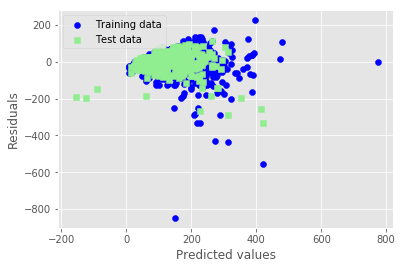

In [87]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue',marker='o',label = 'Training data')
plt.scatter(y_test_pred,y_test_pred - y_test,c='lightgreen',marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

In [94]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import grid_search
rms_ols2 = sqrt(mean_squared_error(y_test,y_test_pred))

print('MSE train:%.3f,test: %.3f'% (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
print('R^2 train: %.3f,test: %3f'% (r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

MSE train:364.005,test: 2255.401
R^2 train: 0.945,test: 0.661285


E:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# random forest

In [98]:
from sklearn.ensemble import RandomForestRegressor
parameters = [{'n_estimators':[10,100,1000], 
               'criterion':['mse'],
               'max_depth':[10,50,100,200],
               'min_samples_split':[2,5,10],
               'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3,0.4,0.5] }]
forest = grid_search.GridSearchCV(RandomForestRegressor(), parameters)
# forest = RandomForestRegressor(n_estimators = 500,criterion='mse',random_state = 42,n_jobs=-1)
forest.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 100, 1000], 'criterion': ['mse'], 'max_depth': [10, 50, 100, 200], 'min_samples_split': [2, 5, 10], 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [99]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1003.327, test: 1952.832
R^2 train: 0.849, test: 0.707


##  5.result 

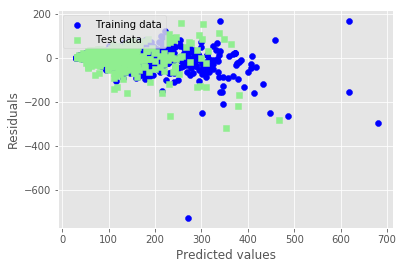

In [100]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue',marker='o',label = 'Training data')
plt.scatter(y_test_pred,y_test_pred - y_test,c='lightgreen',marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

In [101]:
rmse_randfor = sqrt(mean_squared_error(y_test,y_test_pred))
compare = pd.Series([rms_ols,rms_ols2,rmse_randfor],index = ['ols1','ols2','random forest'])
compare

ols1             56.382923
ols2             47.491059
random forest    44.190854
dtype: float64

### model save

In [102]:
from sklearn.externals import joblib
joblib.dump(forest, './forest.pkl') 
fj = joblib.load('./forest.pkl')